# Temporal Networks v1.0 #

In [1]:
import sys
sys.path.append("/home/genois/Bureau/tempnet/")
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
import tempnet.utils as tnu
import tempnet.measures as tnm
import tempnet.randomisations as tnr

## Link shuffling ##
We here present randomization techniques based which shuffle links in the static network. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Link permutation $\text{P}[p_\mathcal{L}(\Theta)]$: `P__pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`.

In [11]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__pTheta(lks_data)

Test of the mean degree preservation:

In [12]:
deg0 = tnm.degrees(lks_data.links())
deg1 = tnm.degrees(new_lks.links())
sum(deg0.values()) == sum(deg1.values())

True

Test of the link permutation:

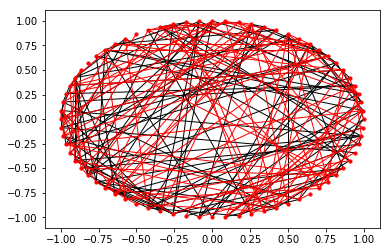

In [13]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Link permutation $\text{P}[\mathbb{I}_\lambda,p_\mathcal{L}(\Theta)]$: `P__I_pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data` while ensuring that the aggregated randomised network is simply connected. It relies on the `is_connected()` function from `networkx`.

In [4]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__I_pTheta(lks_data)

### Link permutation with degree preservation $\text{P}[\mathbf{k},p_\mathcal{L}(\Theta)]$: `P__k_pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`, while preserving the degrees of the nodes.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__k_pTheta(lks_data)

Test of the degree preservation:

In [4]:
deg0 = tnm.degrees(lks_data.links())
deg1 = tnm.degrees(new_lks.links())
Test = np.array([deg0[n] == deg1[n] for n in deg0])
Test.all()

True

Test of the link permutation:

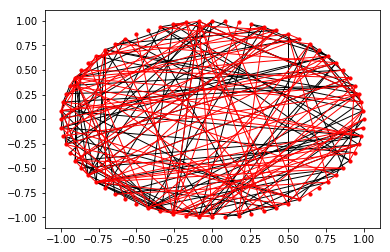

In [5]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Link permutation with degree preservation $\text{P}[\mathbf{k},\mathbb{I}_\lambda,p_\mathcal{L}(\Theta)]$: `P__k_I_pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data` while prserving the degrees of the nodes and ensuring that the aggregated randomised network is simply connected. It relies on the `is_connected()` function from `networkx`.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__k_I_pTheta(lks_data)

### Link permutation with groups preservation $\text{P}[p_\mathcal{L}(\Theta),\sigma,\Sigma_\mathcal{L}]$: `P__pTheta_sigma_SigmaL(lks_data,group)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`, but conserves the group structure defined as the contact matrix in link density between the different groups of nodes. The information about the group affiliations is given via the `group` dictionary, which associates to each node the label of its group.

In [7]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
metadata = np.loadtxt("/home/genois/Bureau/tempnet/metadata_InVS13.dat",dtype='string')
groups = {int(l[0]):l[1] for l in metadata}
new_lks = tnr.P__pTheta_sigma_SigmaL(lks_data,groups)

Test of the contact matrix preservation:

In [8]:
CM0,labels = tnm.LCM(lks_data.links(),groups)
CM1,labels = tnm.LCM(new_lks.links(),groups)
Test = np.array_equal(CM0,CM1)
Test

True

Test of the link permutation:

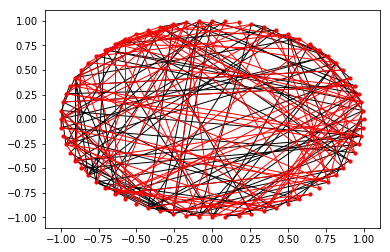

In [9]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Link permutation with groups and degree preservation $\text{P}[\mathbf{k},p_\mathcal{L}(\Theta),\sigma,\Sigma_\mathcal{L}]$: `P__k_pTheta_sigma_SigmaL(lks_data,group,n_iter=3)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`, but conserves the node degrees and the group structure defined as the contact matrix in link density between the different groups of nodes. The information about the group affiliations is given via the `group` dictionary, which associates to each node the label of its group. The function uses the Sneppen-Maslov algorithm to permutate the links. The user can thus define the number of times the function permutates links. This number is given by $n_{\rm iter}\times n_L$, where $n_{\rm iter}$ is the parameter of the function and $n_L$ the number of links in the system. The value of `n_iter` is set to 3 by default. This function returns a `link_timeline()` object and a table of the evolution of the Jaccard similarity index between the original set of links and the new one, so that the user can test the convergence of the method.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
metadata = np.loadtxt("/home/genois/Bureau/tempnet/metadata_InVS13.dat",dtype='string')
groups = {int(l[0]):l[1] for l in metadata}
new_lks,converge = tnr.P__k_pTheta_sigma_SigmaL(lks_data,groups)

Test of the convergence:

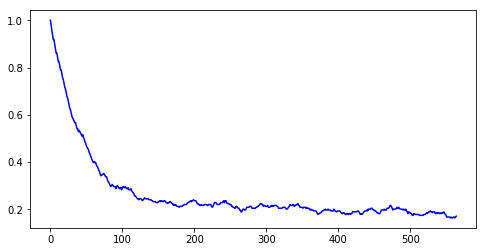

In [4]:
fig = plt.figure(figsize=(8,4))
plt.plot(range(len(converge)),converge,'b-')

Test of the contact matrix preservation:

In [5]:
CM0,labels = tnm.LCM(lks_data.links(),groups)
CM1,labels = tnm.LCM(new_lks.links(),groups)
Test = np.array_equal(CM0,CM1)
Test

True

Test of the degree preservation:

In [6]:
deg0 = tnm.degrees(lks_data.links())
deg1 = tnm.degrees(new_lks.links())
Test = np.array([deg0[n] == deg1[n] for n in deg0])
Test.all()

True

In [7]:
print CM0
print CM1

[[ 0.12873563  0.01041667  0.02051282  0.01801802  0.00833333]
 [ 0.01041667  0.06666667  0.00480769  0.0152027   0.03125   ]
 [ 0.02051282  0.00480769  0.12820513  0.01039501  0.01923077]
 [ 0.01801802  0.0152027   0.01039501  0.09159159  0.00675676]
 [ 0.00833333  0.03125     0.01923077  0.00675676  0.        ]]
[[ 0.12873563  0.01041667  0.02051282  0.01801802  0.00833333]
 [ 0.01041667  0.06666667  0.00480769  0.0152027   0.03125   ]
 [ 0.02051282  0.00480769  0.12820513  0.01039501  0.01923077]
 [ 0.01801802  0.0152027   0.01039501  0.09159159  0.00675676]
 [ 0.00833333  0.03125     0.01923077  0.00675676  0.        ]]


### Permutation of group labels $\text{P}[G,p(\sigma)]$: `P__G_psigma(group)` ###
This function randomly permutates the group labels of the nodes, while preserving the whole temporal network. The information about the group affiliations is given via the `group` dictionary, which associates to each node the label of its group. This function returns a new dictionary of randomised group affiliations.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
metadata = np.loadtxt("/home/genois/Bureau/tempnet/metadata_InVS13.dat",dtype='string')
groups = {int(l[0]):l[1] for l in metadata}
new_groups = tnr.P__G_psigma(groups)

Test of the modification of the contact matrix:

In [4]:
CM0,labels = tnm.LCM(lks_data.links(),groups)
CM1,labels = tnm.LCM(lks_data.links(),new_groups)
Test = np.array_equal(CM0,CM1)
Test

False

In [5]:
print CM0
print CM1

[[ 0.12873563  0.01041667  0.02051282  0.01801802  0.00833333]
 [ 0.01041667  0.06666667  0.00480769  0.0152027   0.03125   ]
 [ 0.02051282  0.00480769  0.12820513  0.01039501  0.01923077]
 [ 0.01801802  0.0152027   0.01039501  0.09159159  0.00675676]
 [ 0.00833333  0.03125     0.01923077  0.00675676  0.        ]]
[[ 0.04827586  0.04375     0.04102564  0.04504505  0.03333333]
 [ 0.04375     0.05        0.01923077  0.04222973  0.03125   ]
 [ 0.04102564  0.01923077  0.01282051  0.03326403  0.01923077]
 [ 0.04504505  0.04222973  0.03326403  0.02852853  0.00675676]
 [ 0.03333333  0.03125     0.01923077  0.00675676  0.16666667]]
